In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
import pandas as pd
import random as rand
import string
import math
chars = string.ascii_uppercase + string.digits
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
import seaborn as sns
import sklearn as skl
import skimage as ski
from sklearn.preprocessing import LabelEncoder
from scipy import spatial
from sklearn.utils import shuffle
from os import system
import skimage as ski
from skimage.color import rgb2gray
from scipy import misc
from skimage.exposure import adjust_gamma
import scipy.stats as st


# setting up number of microsats and number of alleles per microsat

In [2]:
NMICROSATS = 7
NALLELEPERMICROSAT = 5
topology = ski.img_as_float(rgb2gray(misc.imread("roads/noroad.png")))
topology.shape

(500, 1000)

# generate new individuals functions

In [3]:


population = pd.DataFrame(columns = ['Boldness', 'Sex', 'Age', 'Position'] + ['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)])
population.index.name = 'name'

def generate_random_coyote(N):
    df = pd.DataFrame( columns = ['Boldness', 'Sex', 'Age'])
    df.index.name='name'
    for i in range(N):
        new_coyote = pd.DataFrame()
        new_coyote['name'] = ["Coyote"+"".join([rand.choice(chars) for k in range(6)])]
        new_coyote["Position"] = [np.array([rand.uniform(0,topology.shape[0]-1),rand.uniform(0,topology.shape[1]-1)])]
        new_coyote['Sex'] = np.random.choice(["male", "female"], 1)
        new_coyote['Age'] =  np.random.normal(3, 1., 1)
        for n in range(NMICROSATS):
            new_coyote["mSat"+ str(n+1).zfill(2)] = [tuple([rand.choice(string.ascii_uppercase[:NALLELEPERMICROSAT]), rand.choice(string.ascii_uppercase[:NALLELEPERMICROSAT])])]
        
        new_coyote['Boldness'] = [rand.random()]
        new_coyote = new_coyote.set_index(new_coyote.name)
        del new_coyote["name"]
        
        df =df.append(new_coyote)
    return df
        

    
def coyote_puppy(momma, poppa, N):
    global population
    df = pd.DataFrame( columns = ['Boldness', 'Sex', 'Age'])
    df.index.name='name'
    for i in range(N):
        puppy = pd.DataFrame()
        puppy['name'] = ["Coyote"+"".join([rand.choice(chars) for k in range(6)])]
        
        puppy['Age'] =[.5]
        puppy["Position"] = [np.array([momma.Position[0]+rand.uniform(-3,3), momma.Position[1]+rand.uniform(-3,3)])]
        puppy['Sex'] = np.random.choice(["male", "female"], 1)
        for n in range(NMICROSATS):
            alleles_from_parents = [np.random.choice(momma["mSat"+ str(n+1).zfill(2)], 1)[0], np.random.choice(poppa["mSat"+ str(n+1).zfill(2)], 1)[0]]
            if rand.random() < 10**(-3): #mutation rate
                print("new allele")
                which_allele_to_mutate = rand.randint(0,1) 
                alleles_from_parents[which_allele_to_mutate] += rand.choice(string.ascii_lowercase)
            puppy["mSat"+ str(n+1).zfill(2)] = [tuple(alleles_from_parents)]
        puppy['Boldness'] = [(momma.Boldness + poppa.Boldness)/2 +.3*rand.uniform(-1,1)]
        if puppy['Boldness'].values[0] < 0 :  puppy['Boldness'] = [0]
        if puppy['Boldness'].values[0] > 1 :  puppy['Boldness'] = [1]
        puppy = puppy.set_index(puppy.name)
        del puppy["name"]
        df =df.append(puppy)
    
    population = pd.concat([population,df])
    


# Generate initial population

In [4]:

population = pd.concat([population, generate_random_coyote(100)])

population.head()


,Age,Boldness,Position,Sex,mSat01,mSat02,mSat03,mSat04,mSat05,mSat06,mSat07
name,,,,,,,,,,,
CoyoteJQRLKB,3.364391,0.691468,"[346.12262498, 937.574807639]",female,"(A, B)","(B, C)","(B, C)","(A, A)","(A, C)","(E, C)","(C, A)"
CoyoteEK80FG,2.558439,0.321572,"[71.5324553298, 219.195723241]",male,"(B, D)","(B, B)","(E, D)","(B, A)","(A, C)","(A, C)","(B, B)"
CoyoteUOZK8D,3.787817,0.829060,"[329.481338755, 966.389439799]",female,"(D, E)","(D, A)","(D, B)","(E, D)","(C, C)","(E, D)","(B, C)"
Coyote8API7U,4.455649,0.001961,"[1.80107299992, 592.926101324]",male,"(B, C)","(A, E)","(B, C)","(E, C)","(C, B)","(B, C)","(E, D)"
CoyoteWYTRI4,3.455242,0.148089,"[493.440689659, 417.339592753]",female,"(C, E)","(B, B)","(B, A)","(A, A)","(B, E)","(C, D)","(B, A)"


In [5]:
population.iloc[2].Position[1]

966.3894397991096

In [6]:
coyote_puppy(population.iloc[2], population.iloc[1], 4)
population.tail()


,Age,Boldness,Position,Sex,mSat01,mSat02,mSat03,mSat04,mSat05,mSat06,mSat07
name,,,,,,,,,,,
Coyote9FDIVM,2.016898,0.947363,"[123.916528636, 696.418010915]",male,"(A, B)","(C, A)","(E, D)","(E, C)","(E, D)","(D, C)","(A, C)"
CoyoteNDG4PK,0.500000,0.538781,"[332.097723861, 964.277343398]",female,"(D, D)","(A, B)","(B, E)","(E, A)","(C, C)","(E, C)","(B, B)"
Coyote90T71C,0.500000,0.679034,"[328.137173009, 966.632725719]",female,"(D, B)","(D, B)","(B, E)","(E, B)","(C, A)","(E, C)","(B, B)"
Coyote2CKO4B,0.500000,0.311476,"[328.215504041, 968.943193845]",male,"(E, D)","(A, B)","(D, E)","(E, B)","(C, C)","(D, C)","(C, B)"
CoyoteKJJ2R5,0.500000,0.423272,"[328.752689586, 963.693868998]",female,"(E, B)","(D, B)","(D, D)","(D, A)","(C, C)","(E, C)","(C, B)"


# Functions to calculate Heterozigosity and FST

In [7]:
def Heterozigosity(loci, pop):
    result = 0
    for i in pop[loci].values:
        if i[0] != i[1]: result += 1
    return result/pop.shape[0]

def AllHeterozigosity(pop):
    return [Heterozigosity(i, pop) for i in ['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]]

def FST():
    example = population.copy()
    example['side'] = example.Position.apply(lambda x: ["A" if x[1]>500 else "B"][0])
    example.head()
    sidea = example[example.side == 'A']
    sideb = example[example.side == 'B']
    if sidea.shape[0] == 0 or sideb.shape[0]==0: return np.array([0 for i in range(NMICROSATS)])
    HA = np.array(AllHeterozigosity(sidea))
    HB = np.array(AllHeterozigosity(sidea))
    Hpop = np.array(AllHeterozigosity(population))         
    return (Hpop - (HA+HB)/2)/ Hpop

        

In [8]:
def Expected_Heterozigosity(loci, pop):
    unique_elements, counts_elements = np.unique(list(pop[loci].values), return_counts=True)
    counts_elements = np.array(counts_elements/sum(counts_elements))
    return 1 - sum(counts_elements*counts_elements)

def Expected_AllHeterozigosity(pop):
    return [Expected_Heterozigosity(i, pop) for i in ['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]]

def Expected_FST():
    example = population.copy()
    example['side'] = example.Position.apply(lambda x: ["A" if x[1]>500 else "B"][0])
    example.head()
    sidea = example[example.side == 'A']
    sideb = example[example.side == 'B']
    if sidea.shape[0] == 0 or sideb.shape[0]==0: return np.array([0 for i in range(NMICROSATS)])
    HA = np.array(Expected_AllHeterozigosity(sidea))
    HB = np.array(Expected_AllHeterozigosity(sidea))
    Hpop = np.array(Expected_AllHeterozigosity(population))         
    return (Hpop - (HA+HB)/2)/ Hpop

# Plot individuals on grid

In [9]:
def plot_on_map():
    example = population.copy()
    example['posx'] = example.Position.apply(lambda x: x[1])
    example['posy'] = example.Position.apply(lambda x: x[0])
    ax =example[example.Sex == 'female'].plot.scatter('posx', 'posy', c = 'Age' , cmap = 'Reds',s = example.Boldness.apply(lambda x : math.log10(abs(x)*1000000)*30), colorbar = False)
    example[example.Sex == 'male'].plot.scatter('posx', 'posy', c = 'Age' , cmap = 'Blues',s = example.Boldness.apply(lambda x : math.log10(abs(x)*1000000)*30),colorbar = False,  ax =ax)
    plt.xlim([0,topology.shape[1]])
    plt.ylim([0,topology.shape[0]])

    

#plot_on_map()

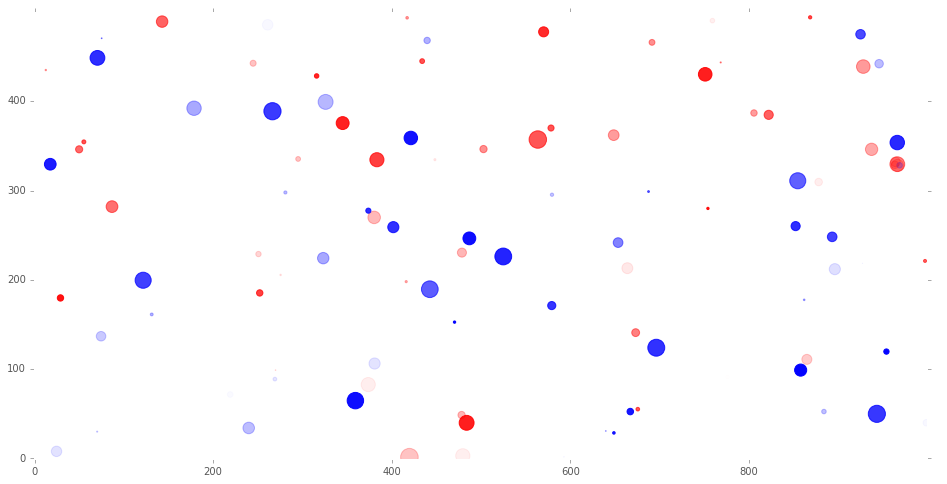

In [10]:
def plot_on_map2():
    plt.rcParams["figure.figsize"] = (16,8)
    fig, ax = plt.subplots(1, 1)
    plt.imshow(topology,  origin='lower', cmap= 'gray', vmin =0, vmax =1)
    #ax.grid(False)
    #ax.axis('off')
    for row in population.itertuples():
        y, x, r = row.Position[0], row.Position[1], row.Boldness
        if row.Sex == 'male': color = 'blue'
        else:                 color = 'red'
        c = plt.Circle((x, y) ,r*10, color=color, linewidth=1, alpha = 0.4*row.Age)
        ax.add_patch(c)
    #ax.text(x,y, str(number), color = 'white')

plot_on_map2()

# function for migration

In [11]:
def migration(position, dt, age, boldfac):
    global topology
    speed = [2,7,5,5,4,3,3,2,2,1,1,1,1,1,1,1][int(age)]
    angle = 2*math.pi*rand.random()
    distance = np.array([math.sin(angle), math.cos(angle)])*dt*speed*50
    pfy, pfx = position[0]+distance[0], position[1]+distance[1]
    
    
    if pfx > (topology.shape[1]-1): pfx = 2*(topology.shape[1]-1) - (distance[1] + position[1]) 
    if pfy > (topology.shape[0]-1): pfy = 2*(topology.shape[0]-1) - (distance[0] + position[0]) 
    if pfx < 0: pfx = abs(pfx)
    if pfy < 0: pfy = abs(pfy)
        
        
    if int(pfx) == int(position[1]) or int(pfy) == int(position[0]): surviveProb =1 
        #there is something weird here, There is a case that just enters this clause

    elif int(pfx) == int(position[1]):
        if int(pfy) == int(position[0]):  surviveProb = topology[int(pfy) ,int(pfx)]
        elif int(pfy) > int(position[0]): surviveProb = topology[int(position[0]):int(pfy), int(pfx)].mean()
        else:                             surviveProb = topology[int(pfy):int(position[0]), int(pfx)].mean()
            
    elif int(pfy) == int(position[0]):
        if int(pfx) > int(position[1]):   surviveProb = topology[int(pfy), int(pfx): int(position[1])].mean()
        else:                             surviveProb = topology[int(pfy), int(position[1]): int(pfx)].mean()
        
    elif int(pfx) > int(position[1]):
        if int(pfy) > int(position[0]): surviveProb = topology[int(position[0]):int(pfy), int(position[1]): int(pfx)].mean()
        else: surviveProb = topology[int(pfy):int(position[0]) , int(position[1]): int(pfx)].mean()

    else:
        if int(pfy) > int(position[0]): surviveProb = topology[int(position[0]): int(pfy), int(pfx) :int(position[1])].mean()
        else: surviveProb = topology[int(pfy):int(position[0]) ,int(pfx): int(position[1])].mean()
            
    
    if (1- surviveProb) > boldfac: return [position[0], position[1]]
    if rand.random()*.65 > surviveProb: return np.NAN
    
    return [pfy,pfx]

#testing
#population["Position"]= population.apply(lambda x: migration(x['Position'], 1, x['Age']), axis = 1)
#population = population.dropna()
#population.head()

    
    

# Function for Aging

In [12]:
def aging(age , dt):
    return age + dt

population['Age'] = population["Age"].apply(lambda x: aging(x, 1/24/365))
population.head()

,Age,Boldness,Position,Sex,mSat01,mSat02,mSat03,mSat04,mSat05,mSat06,mSat07
name,,,,,,,,,,,
CoyoteJQRLKB,3.364506,0.691468,"[346.12262498, 937.574807639]",female,"(A, B)","(B, C)","(B, C)","(A, A)","(A, C)","(E, C)","(C, A)"
CoyoteEK80FG,2.558554,0.321572,"[71.5324553298, 219.195723241]",male,"(B, D)","(B, B)","(E, D)","(B, A)","(A, C)","(A, C)","(B, B)"
CoyoteUOZK8D,3.787931,0.829060,"[329.481338755, 966.389439799]",female,"(D, E)","(D, A)","(D, B)","(E, D)","(C, C)","(E, D)","(B, C)"
Coyote8API7U,4.455763,0.001961,"[1.80107299992, 592.926101324]",male,"(B, C)","(A, E)","(B, C)","(E, C)","(C, B)","(B, C)","(E, D)"
CoyoteWYTRI4,3.455356,0.148089,"[493.440689659, 417.339592753]",female,"(C, E)","(B, B)","(B, A)","(A, A)","(B, E)","(C, D)","(B, A)"


# Function for Dieing

In [13]:
#calc probs of surviving for x years
print(.9987**365 * .9996**365 * .9996**365 * .9987**365 *.998**365 *.995**365)

#tested and working
def dieying(Age):
    prob_of_surviving_by_age_per_day = [.9987, .9996, .9996, .9987, .998, .995, .99, .985, .98, .977, .9, .8,.7,.5, 0]
    prob_seeing_another_day = prob_of_surviving_by_age_per_day[int(Age)]
    if rand.random()>prob_seeing_another_day: return True
    return False

#using dieing function

def killsome():
    global population
    population['willdie'] = population['Age'].apply(dieying)
    population = population[population["willdie"]== False]
    del population['willdie']

print(population.shape)
killsome()
print(population.shape)




0.022326420163582696
(104, 11)
(104, 11)


# Function for giving birth 


In [14]:
def nearest_male(female):
    males = population[population['Sex'] == 'male']
    distances_list = np.array(males["Position"].values.tolist())
    distance,indexx = spatial.KDTree(distances_list).query(np.array(female['Position']))
    return males.iloc[indexx]
    

def procreate(female):
    global population
    breeding_ages = [[1 + x-(1/365)/2, 1+x +(1/365)/2] for x in range(1, 10)]
    is_breeding = False
    for i in breeding_ages: 
        if i[0]<female['Age']<i[1]: 
            if population.shape[0] <= 200:
                coyote_puppy(female, nearest_male(female), rand.randint(4,7) ) #if rand.random() > .9:
            
def birth():
    global population
    a = population[population['Sex'] == 'female'].copy()
    a = shuffle(a)
    for i in range(a.shape[0]): procreate(a.iloc[i])
    
population.head()

,Age,Boldness,Position,Sex,mSat01,mSat02,mSat03,mSat04,mSat05,mSat06,mSat07
name,,,,,,,,,,,
CoyoteJQRLKB,3.364506,0.691468,"[346.12262498, 937.574807639]",female,"(A, B)","(B, C)","(B, C)","(A, A)","(A, C)","(E, C)","(C, A)"
CoyoteEK80FG,2.558554,0.321572,"[71.5324553298, 219.195723241]",male,"(B, D)","(B, B)","(E, D)","(B, A)","(A, C)","(A, C)","(B, B)"
CoyoteUOZK8D,3.787931,0.829060,"[329.481338755, 966.389439799]",female,"(D, E)","(D, A)","(D, B)","(E, D)","(C, C)","(E, D)","(B, C)"
Coyote8API7U,4.455763,0.001961,"[1.80107299992, 592.926101324]",male,"(B, C)","(A, E)","(B, C)","(E, C)","(C, B)","(B, C)","(E, D)"
CoyoteWYTRI4,3.455356,0.148089,"[493.440689659, 417.339592753]",female,"(C, E)","(B, B)","(B, A)","(A, A)","(B, E)","(C, D)","(B, A)"


# Function to Simulate a Day | Month | Year

In [15]:
def Aday():
    global population
    population['Age'] = population["Age"].apply(lambda x: aging(x, 1/365))
    killsome()
    birth()
    for i in range(16):
        population["Position"]= population.apply(lambda x: migration(x['Position'], .5, x['Age'], x["Boldness"]), axis = 1)
        population = population.dropna()
        
def Amonth():
    global population
    for i in range(30): Aday()
        
def Ayear():
    global population
    for i in range(365): Aday()

In [16]:
a = []
avg_age_list = []
temporal_heterozigosity = []
avg_boldness_list = []
temporal_FST = []
temporal_expected_FST = []
equalization = 10*365
system('rm -f images_for_video/*.png')

0

# Simulating the population day by day before road construction

new allele
1  years passed
2  years passed
new allele
3  years passed
4  years passed
new allele
5  years passed
6  years passed
new allele
7  years passed
8  years passed
9  years passed
new allele
10  years passed


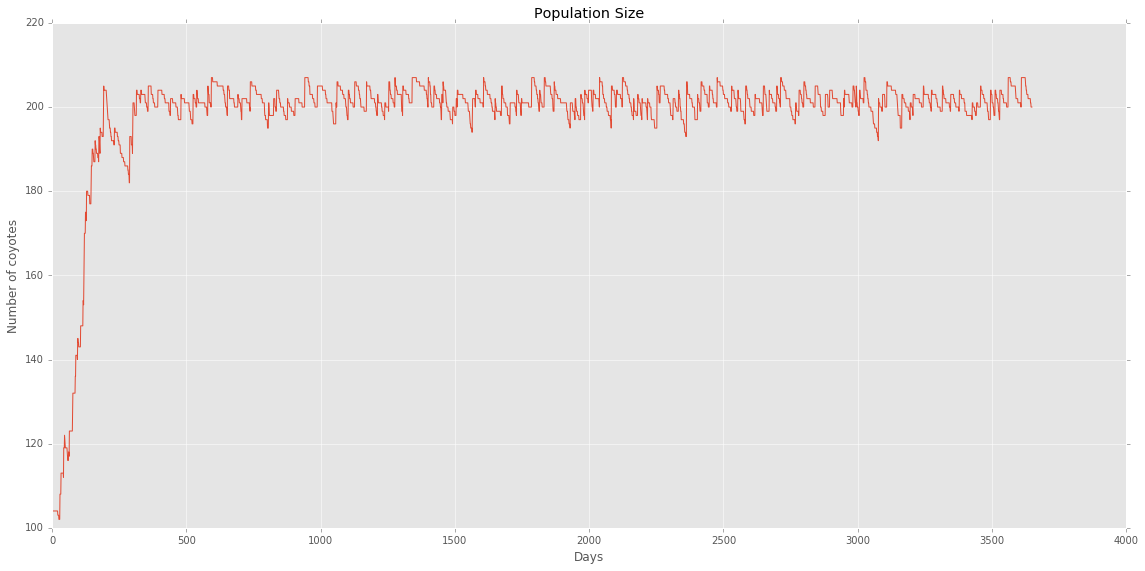

CPU times: user 33min 57s, sys: 1min 11s, total: 35min 9s
Wall time: 33min 50s


In [17]:
%%time


for i in range(equalization):
    if (i +1) % 365 == 0: print(str(int((i+1)/365)) +"  years passed")
    a += [population.shape[0]]
    if population.shape[0] <=5 : break
    avg_age_list += [population['Age'].mean()]
    avg_boldness_list += [population['Boldness'].mean()]
    temporal_heterozigosity += [AllHeterozigosity(population)]
    temporal_FST += [FST()]
    temporal_expected_FST += [Expected_FST()]
    if i % 30 == 0:
        plot_on_map2()
        plt.title("DAY " + str(i))
        plt.savefig('images_for_video/map'+str(i).zfill(10))
        plt.tight_layout()
        plt.close()
    Aday()
    
plt.plot(a)
plt.ylabel('Number of coyotes')
plt.xlabel('Days')
plt.title('Population Size')
plt.tight_layout()
plt.show()



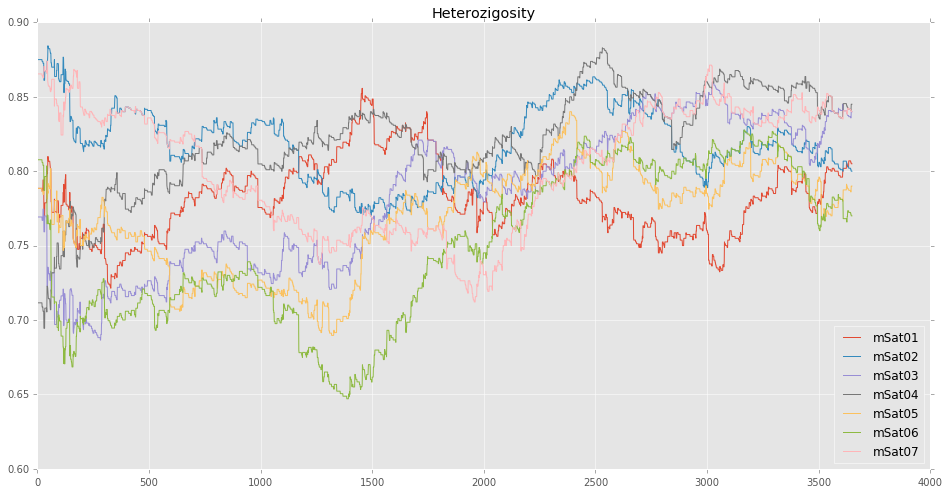

In [18]:
for i in range(NMICROSATS):
    plt.plot(np.array(temporal_heterozigosity)[:, i], label = 'mSat'+ str(i+1).zfill(2))
    
plt.title('Heterozigosity')
plt.legend(loc='best')
plt.savefig("heterozigosity var through time")
plt.show()

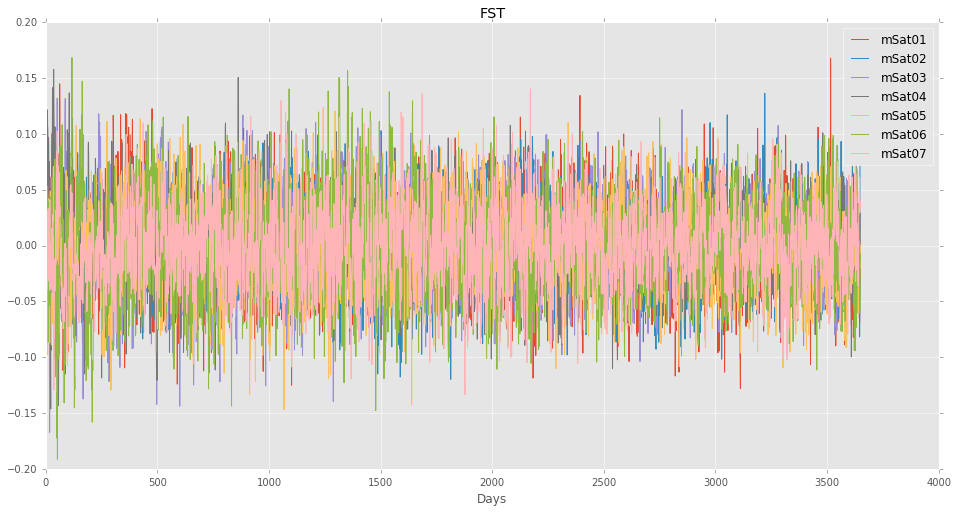

In [19]:
temporal_FST = np.array(temporal_FST)
for count, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
    plt.plot(temporal_FST[:, count], label = i)
    
plt.title("FST")
plt.xlabel('Days')
plt.legend(loc ="best")
plt.show()

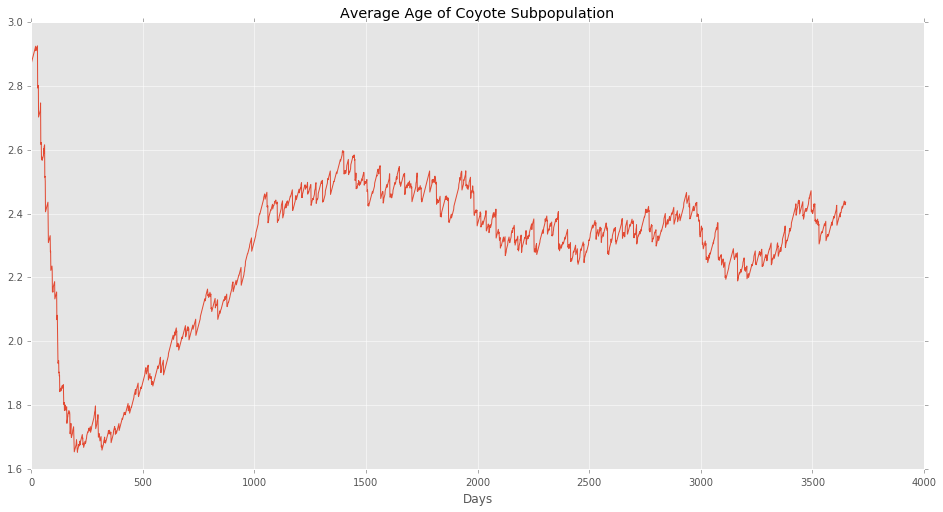

In [20]:
plt.plot(avg_age_list)
plt.title('Average Age of Coyote Subpopulation')
plt.xlabel('Days')
plt.savefig('Age var.png')
plt.show()

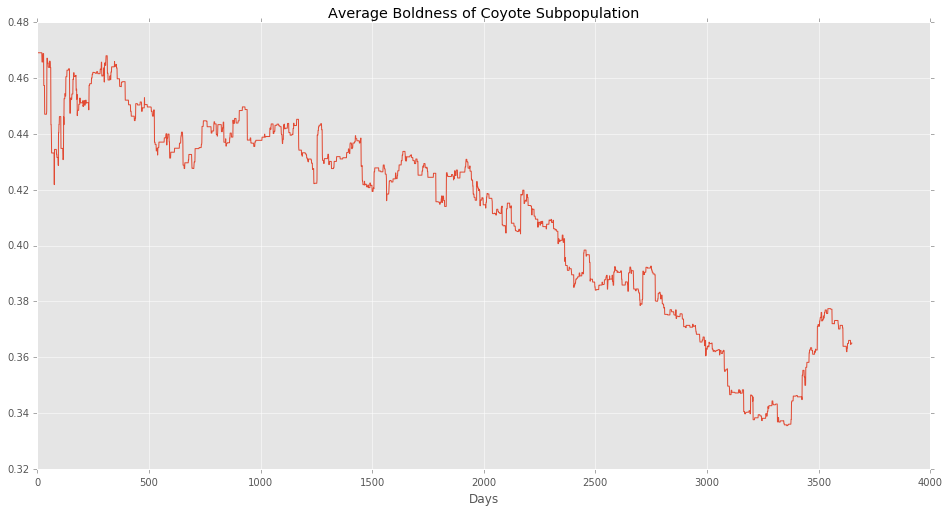

In [21]:
plt.plot(avg_boldness_list)
plt.title('Average Boldness of Coyote Subpopulation')
plt.xlabel('Days')
plt.show()

# Adding road to the simulation

In [22]:
topology = ski.img_as_float(rgb2gray(misc.imread("roads/withcipytregion(1px10m-rd100m).png")))

1  years passed
new allele
new allele
2  years passed
3  years passed
new allele
4  years passed
5  years passed


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


6  years passed
new allele
7  years passed
8  years passed
new allele
9  years passed
10  years passed
new allele
new allele
11  years passed
12  years passed
new allele
new allele
13  years passed
new allele
14  years passed
15  years passed
new allele
16  years passed
17  years passed
new allele
new allele
18  years passed
19  years passed
20  years passed


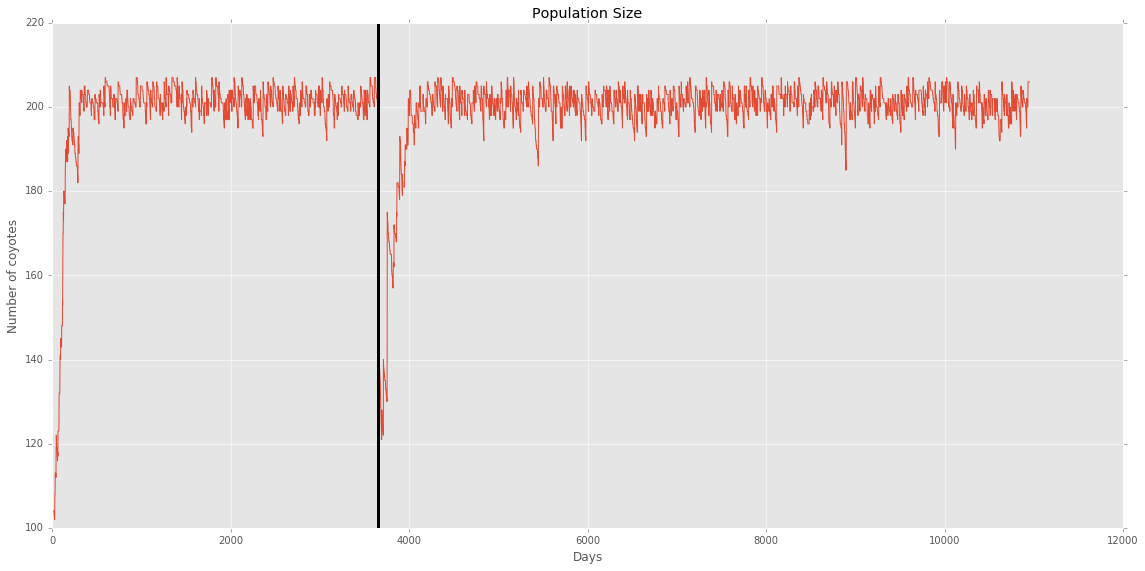

CPU times: user 1h 23min 6s, sys: 2min 23s, total: 1h 25min 30s
Wall time: 1h 23min 8s


In [23]:
%%time

temporal_FST = temporal_FST.tolist()
for i in range(20*365):
    if (i +1) % 365 == 0: print(str(int((i+1)/365)) +"  years passed")
    a += [population.shape[0]]
    if population.shape[0] <=5 : break
    avg_age_list += [population['Age'].mean()]
    avg_boldness_list += [population['Boldness'].mean()]
    temporal_heterozigosity += [AllHeterozigosity(population)]
    temporal_expected_FST += [Expected_FST()]
    temporal_FST += [FST()]
    if i % 30 == 0:
        plot_on_map2()
        plt.title("DAY " + str(i+ equalization))
        plt.savefig('images_for_video/map'+str(i+ equalization).zfill(10))
        plt.tight_layout()
        plt.close()
    Aday()
    
plt.plot(a)
plt.ylabel('Number of coyotes')
plt.xlabel('Days')
plt.axvline(equalization, color='black', linewidth = 3)
plt.title('Population Size')
plt.tight_layout()
plt.show()

7


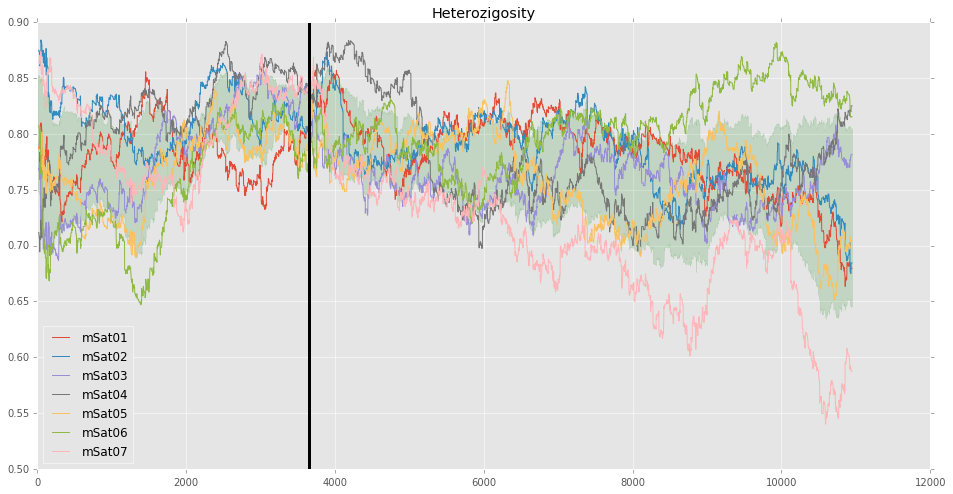

In [24]:

for i in range(NMICROSATS):
    plt.plot(np.array(temporal_heterozigosity)[:, i], label = 'mSat'+ str(i+1).zfill(2))
    
confidence_interval_H = []

print(np.array(temporal_heterozigosity).shape[1])

for i in range( np.array(temporal_heterozigosity).shape[0]):
    abc = temporal_heterozigosity[i]
    confidence_interval_H += [list(st.t.interval(0.95, len(abc)-1, loc=np.mean(abc), scale=st.sem(abc))) ]
confidence_interval_H = np.array(confidence_interval_H)
plt.fill_between(range(np.array(temporal_heterozigosity).shape[0]),confidence_interval_H[:,0], confidence_interval_H[:,1], alpha=.15, color = 'green')

    
plt.title('Heterozigosity')
plt.legend(loc='best')
plt.axvline(equalization, color='black', linewidth = 3)
plt.savefig("heterozigosity var through time after road")
plt.show()

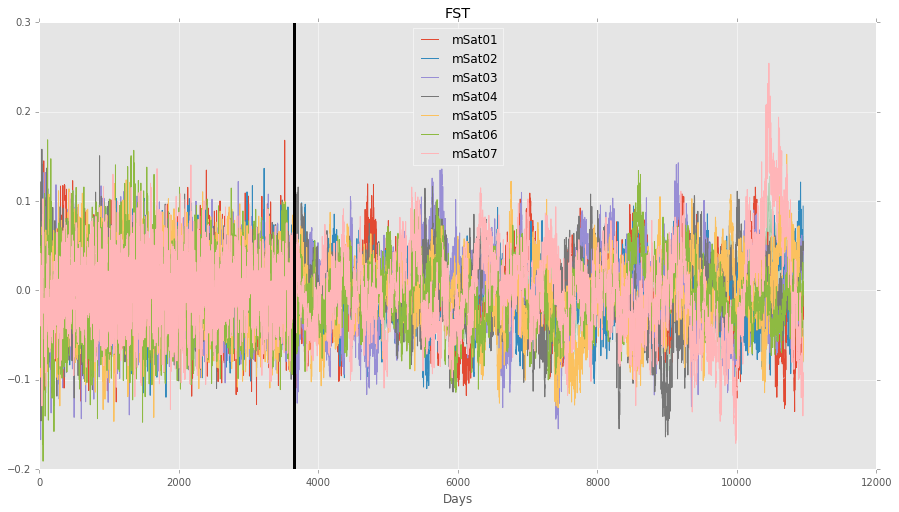

In [25]:
plt.rcParams["figure.figsize"] = (15,8)
temporal_FST = np.array(temporal_FST)
for count, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
    plt.plot(temporal_FST[:, count], label = i)
    
confidence_interval_FST = []
for i in range( temporal_FST.shape[0]):
    abc = temporal_FST[i]
    confidence_interval_FST += [list(st.t.interval(0.95, len(abc)-1, loc=np.mean(abc), scale=st.sem(abc))) ]
confidence_interval_FST = np.array(confidence_interval_FST)
plt.fill_between(range(temporal_FST.shape[0]),confidence_interval_FST[:,0], confidence_interval_FST[:,1], alpha=.15, color = 'green')


plt.title("FST")
plt.xlabel('Days')
plt.axvline(equalization, color='black', linewidth = 3)
plt.legend(loc ="best")
plt.savefig('FST variation')
plt.show()

(10950, 7)


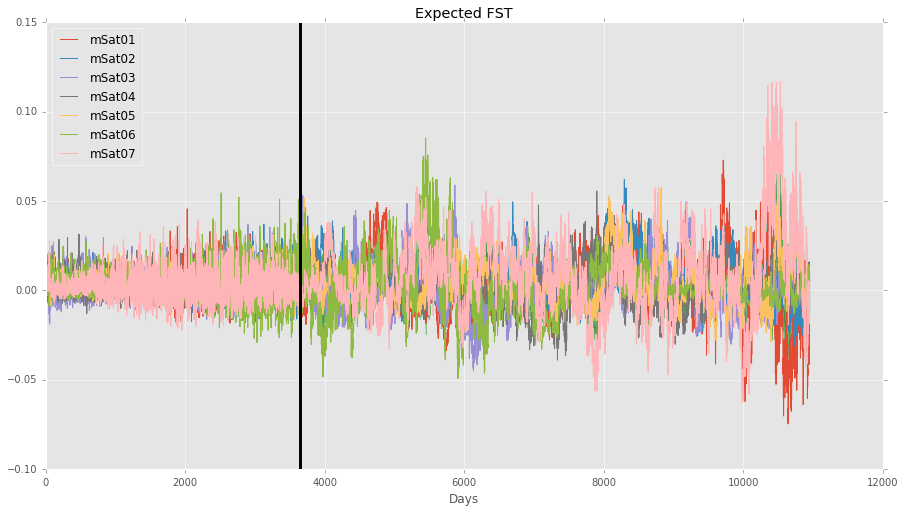

In [40]:
plt.rcParams["figure.figsize"] = (15,8)
temporal_expected_FST = np.array(temporal_expected_FST)


confidence_interval_ex_FST = []
print(temporal_expected_FST.shape)
for i in range( temporal_expected_FST.shape[0]):
    abc = temporal_expected_FST[i]
    confidence_interval_ex_FST += [list(st.t.interval(0.95, len(abc)-1, loc=np.mean(abc), scale=st.sem(abc))) ]
    
confidence_interval_ex_FST = np.array(confidence_interval_ex_FST)

for count, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
    plt.plot(temporal_expected_FST[:, count], label = i)
    
plt.fill_between(range(temporal_expected_FST.shape[0]),confidence_interval_ex_FST[:,0], confidence_interval_ex_FST[:,1], alpha=.5, color = 'green')
plt.title("Expected FST")
plt.xlabel('Days')
plt.axvline(equalization, color='black', linewidth = 3)
plt.legend(loc ="best")
plt.savefig('Expected FST variation')
plt.show()

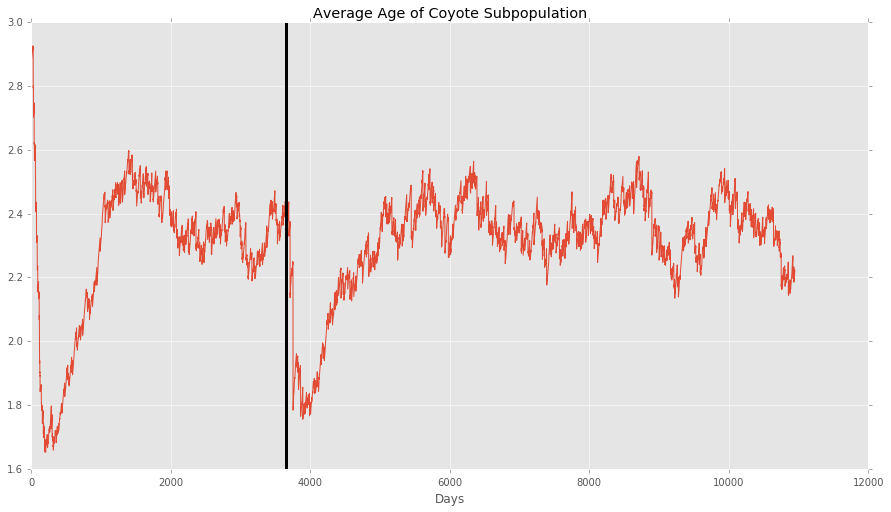

In [27]:
plt.plot(avg_age_list)
plt.title('Average Age of Coyote Subpopulation')
plt.xlabel('Days')
plt.axvline(equalization, color='black', linewidth = 3)
plt.savefig('Age var after road.png')
plt.show()

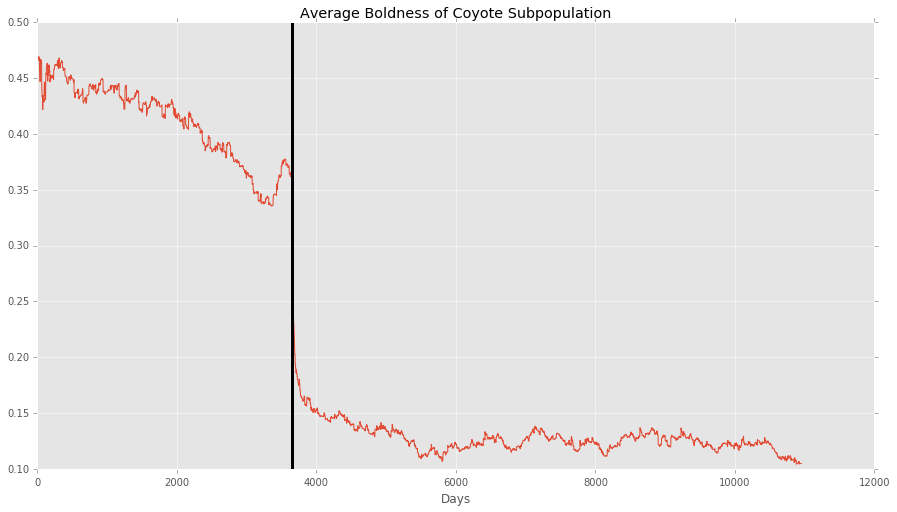

In [28]:
plt.plot(avg_boldness_list)
plt.title('Average Boldness of Coyote Subpopulation')
plt.axvline(equalization, color='black', linewidth = 3)
plt.xlabel('Days')
plt.savefig('variation in boldness')
plt.show()

# Example plots

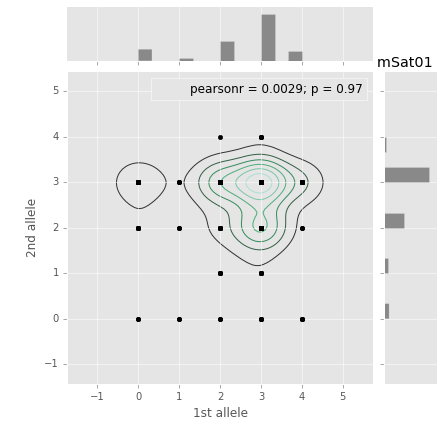

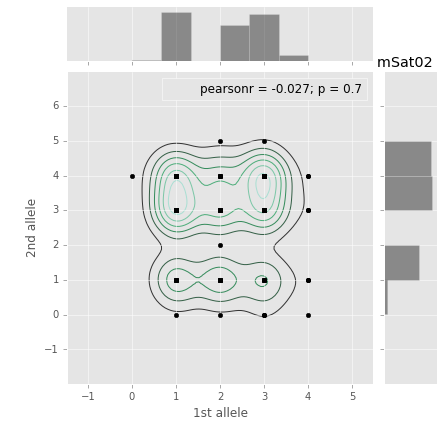

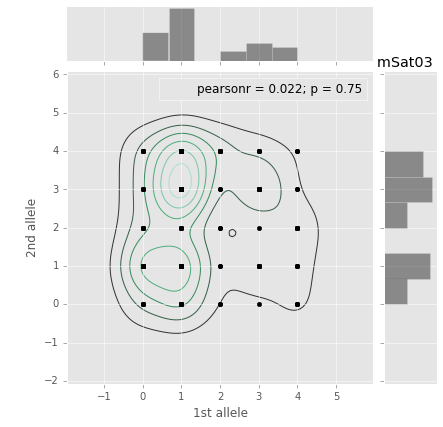

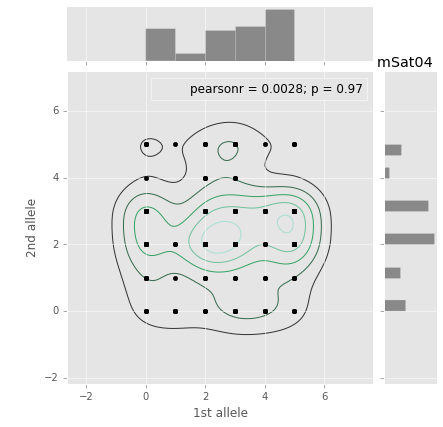

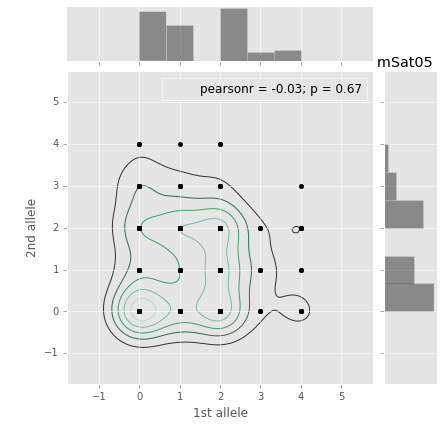

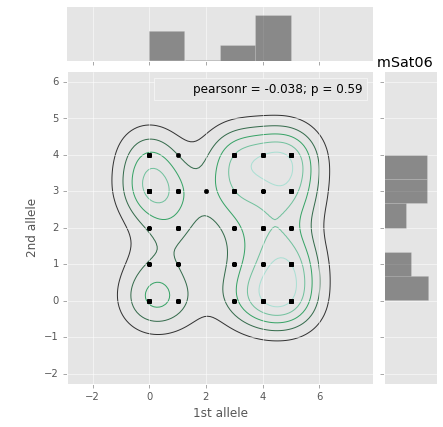

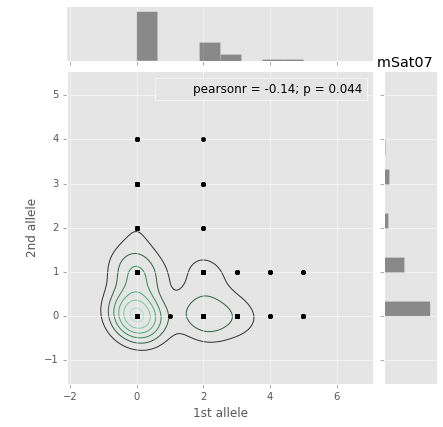

In [46]:
def plot_microsat_allele_dist(microsat, gray = 0):
    example = population.copy()
    example["1st allele"] = example[microsat].apply(lambda x : x[0] )
    example["2nd allele"] = example[microsat].apply(lambda x : x[1] )
    LE = LabelEncoder()
    LE.fit(example["1st allele"].values)

    LE2 = LabelEncoder()
    LE2.fit(example["2nd allele"].values)
    example["1st allele"] = example["1st allele"].apply(lambda x : LE.transform([x])[0])
    example["2nd allele"] = example['2nd allele'].apply(lambda x : LE2.transform([x])[0])
    if gray == 1: 
        (sns.jointplot("1st allele", "2nd allele", data=example, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))
        plt.title("                                                                                "+microsat)
        return 
    sns.jointplot("1st allele", "2nd allele", data=example, kind="kde", space=0, color="red")
    plt.title(microsat)
    


    
for counter, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
    plot_microsat_allele_dist(i,1)
    plt.savefig("allele distribution "+ str(i))
    

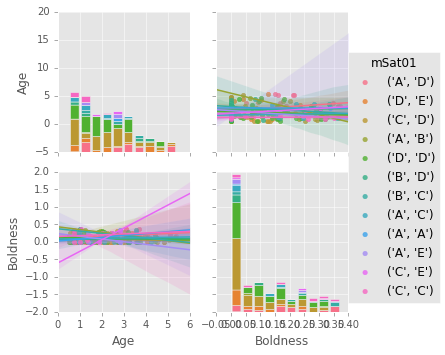

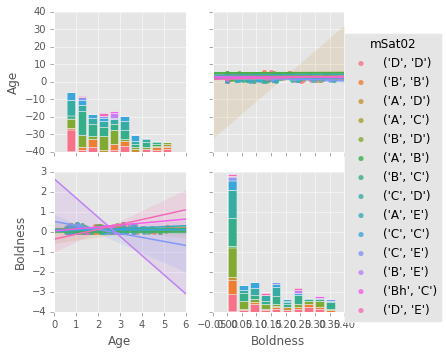

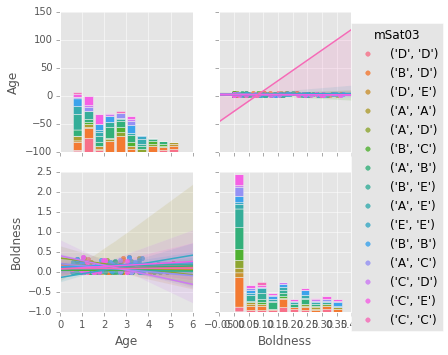

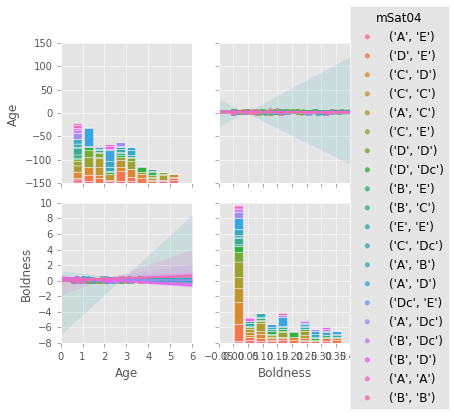

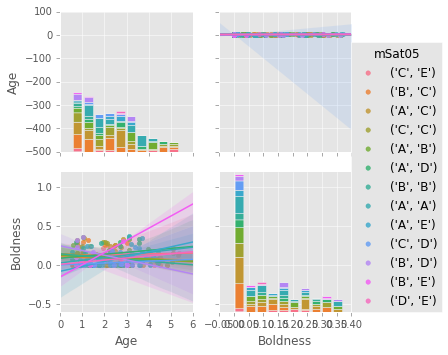

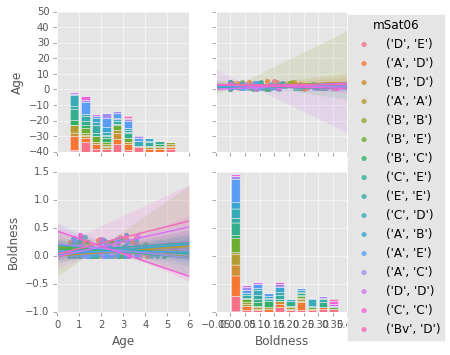

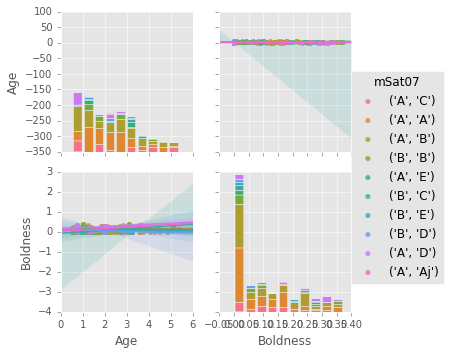

In [45]:
def fuse_equivalents(tup_alleles):
    return tuple(np.sort([tup_alleles[0], tup_alleles[1]]))

plt.rcParams["figure.figsize"] = (15,15)
example = population.copy()
#f, axarr = plt.subplots(ncols = 3, nrows =[int(NMICROSATS/3) if NMICROSATS%3 == 0 else int(NMICROSATS/3)+1][0])
for counter, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
    example[i] = example[i].apply(fuse_equivalents)
    sns.pairplot(example, hue=i,kind="reg")#, diag_kind="kde", plot_kws=dict(s=50, linewidth=1), diag_kws=dict(shade=True)) #  
    plt.savefig("alleles by other factors"+ i)
    plt.close
#plt.show()
#

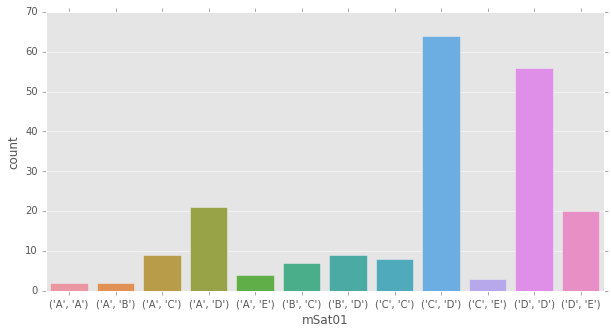

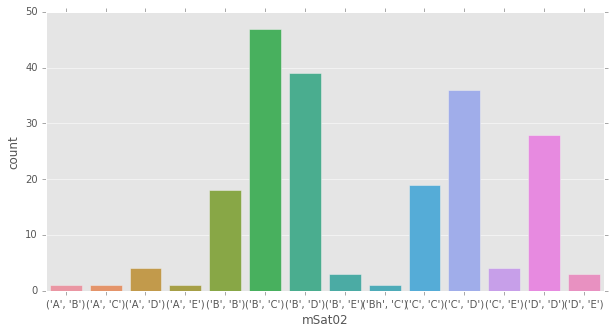

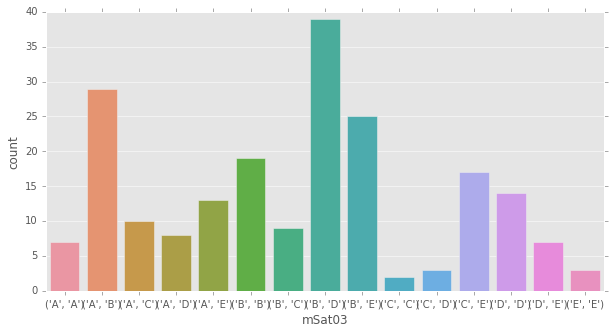

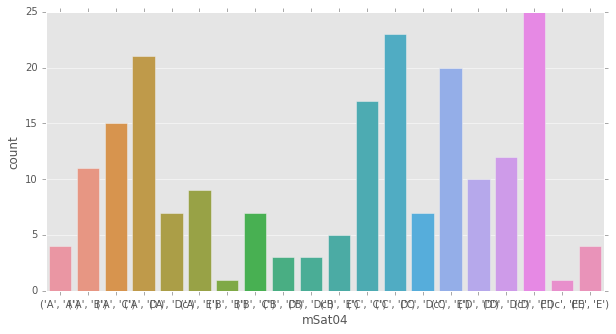

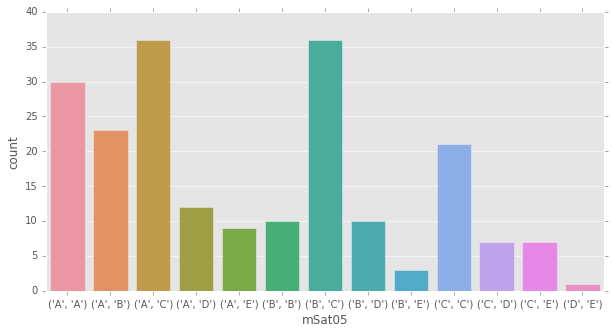

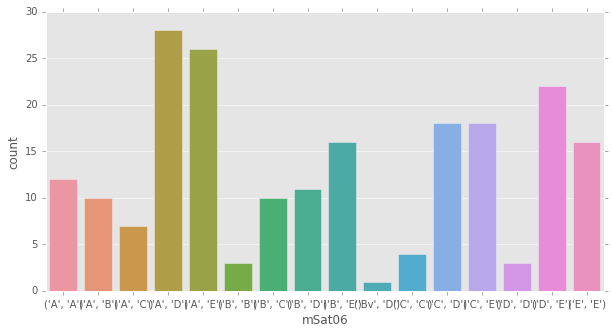

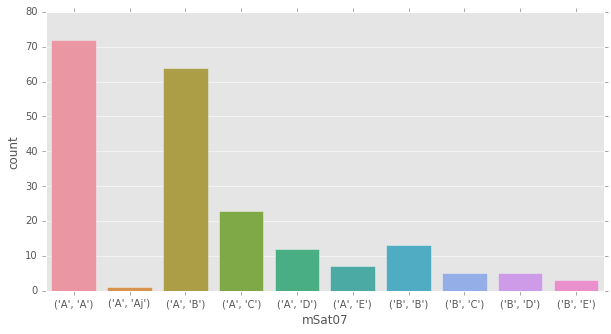

In [41]:
def fuse_equivalents(tup_alleles):
    return tuple(np.sort([tup_alleles[0], tup_alleles[1]]))

plt.rcParams["figure.figsize"] = (10,5)
example = population.copy()
for i in ['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]:
    example[i] = example[i].apply(fuse_equivalents)
    example = example.sort_values(by=i)
    sns.countplot(x=i, data=example)
    plt.savefig("frequency of alleles for microsat "+str(i) )
    plt.show()
    


In [32]:
#system("convert images_for_video/map*.png  images_for_video/animation.mp4 ")

In [33]:


#fig, ax = plt.subplots(ncols = 3, nrows =[int(NMICROSATS/3) if NMICROSATS%3 == 0 else int(NMICROSATS/3)+1][0])
#population['mSat01'].value_counts().plot(ax=ax, kind='bar')

#example = population.copy()
#for count, i in enumerate(['mSat'+ str(i+1).zfill(2) for i in range(NMICROSATS)]):
#    example[i] = example[i].apply(fuse_equivalents)
#    ax[count%3, count/3].plot( population['mSat01'].value_counts(),kind='bar')
#    ax[count%3, count/3].set_title(i)
#    plt.show()